In [13]:
import json
import os
import pandas as pd

from util.config import versioned

df_path = versioned.get_path("matched.parquet")
df_all = None  # TODO Do I need it for visibility?
if os.path.exists(df_path):
    print(f"Reading memoized {df_path}")
    df_all = pd.read_parquet(df_path)
df_all = df_all[df_all["overall_score"] >= 11]

with open(versioned.get_path("people_krs.jsonl")) as pkrs:
    result = [json.loads(jline) for jline in pkrs]

Reading memoized /Users/szymonpajzert/Programming/koryta/data/scrapers/versioned/matched.parquet


In [14]:
df = pd.DataFrame({'employed_end': df_all["employed_end"]})
df_all

,koryta_name,krs_name,pkw_name,wiki_name,birth_year,employed_end,employed_krs,is_polityk,overall_score
0,Wojciech Bartelski,Wojciech Jan Bartelski,Bartelski Wojciech Jan,Wojciech Bartelski,1977,2025-10-07,0000145910,Polityk,31.0
1,Ludwik Rakowski,Ludwik Jerzy Rakowski,Rakowski Ludwik,Ludwik Rakowski,1975,2025-10-07,0000036568,Polityk,31.0
2,Adam Struzik,Adam Krzysztof Struzik,Struzik Adam Krzysztof,Adam Struzik,1957,2025-10-07,0000145910,Polityk,31.0
3,Tomasz Hinc,Tomasz Hinc,HINC Tomasz Wojciech,Tomasz Hinc,1974,2024-03-04,0000075450,Polityk,31.0
4,Marcin Kierwiński,Marcin Piotr Kierwiński,Kierwiński Marcin Piotr,Marcin Kierwiński,1976,2010-03-26,0000184990,Polityk,31.0
...,...,...,...,...,...,...,...,...,...
8741,None,Monika Sobczak,None,Monika Sobczak,1990,2025-10-07,0000211116,Polityk,11.0
8742,None,Jerzy Piotr Lejk,None,Jerzy Lejk,1954,2025-10-07,0000146121,Polityk,11.0
8743,None,Jerzy Jacek Widzyk,None,Jerzy Widzyk,1959,2019-06-19,0000062684,Polityk,11.0
8744,None,Andrzej Jan Arendarski,None,Andrzej Arendarski,1949,2025-10-07,0000044577,Polityk,11.0


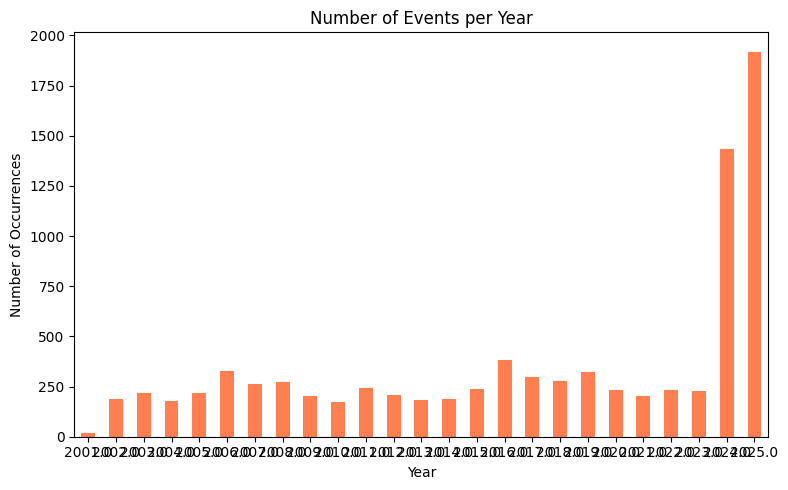

In [15]:
import matplotlib.pyplot as plt

# 2. Convert the 'event_date' column to datetime objects
df['employed_end'] = pd.to_datetime(df['employed_end'])

# 3. Extract the year and count the occurrences
yearly_counts = df['employed_end'].dt.year.value_counts()

# 4. Sort the counts by year (the index) for a chronological chart
yearly_counts = yearly_counts.sort_index()

# 5. Create the bar chart
plt.figure(figsize=(8, 5))
ax = yearly_counts.plot(
    kind='bar',
    color='coral',
    title='Number of Events per Year'
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0) # Keep year labels horizontal
plt.tight_layout()
plt.show()


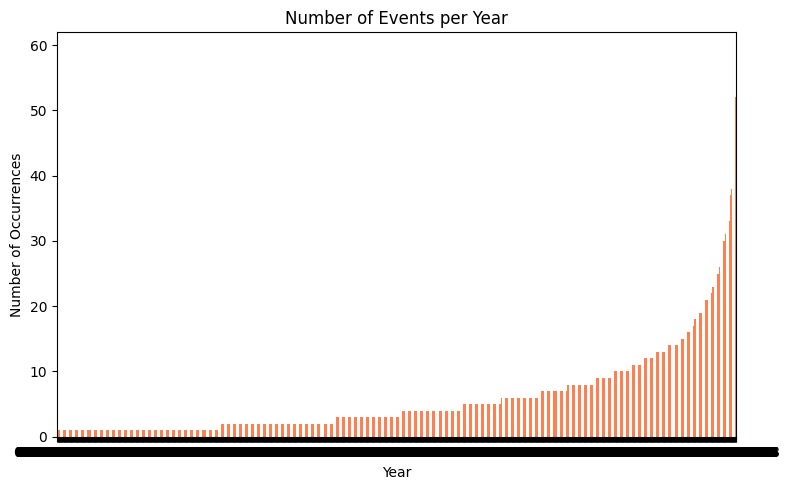

employed_krs
0000106653     1
0000061653     1
0000096096     1
0000036626     1
0000128780     1
              ..
0000022693    45
0000047934    49
0000012483    50
0000033455    52
0000084678    59
Name: count, Length: 1471, dtype: int64

In [19]:
import matplotlib.pyplot as plt

# 3. Extract the year and count the occurrences
yearly_counts = df_all['employed_krs'].value_counts()

# 4. Sort the counts by year (the index) for a chronological chart
yearly_counts = yearly_counts.sort_values()

# 5. Create the bar chart
plt.figure(figsize=(8, 5))
ax = yearly_counts.plot(
    kind='bar',
    color='coral',
    title='Number of Events per Year'
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0) # Keep year labels horizontal
plt.tight_layout()
plt.show()

yearly_counts